In [16]:
# Goal: Plot similar to spectral sequence but zoomed in on the helium lines
# Status: in progress
import sys, os
import numpy as np
import astropy.table as table
import matplotlib.pyplot as plt
import pandas as pd
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.specds as specds
import snelib19odp.absfit as absfit

def load_measurements(sds, entry, rev, line):
    fname = sds.get_absfit_path(entry, fit_rev=rev, line=line)
    if not os.path.isfile(fname):
        # TODO: log a warning?
        return None
    
    result = absfit.AbsFitResult.load(fname)

    ret = {}

    # ret['logz'] = result.meta['logz']

    for i,label in enumerate(result.parameter_names):
        q = np.quantile(result.trace[:,i], [0.025, 0.5, 0.975, 0.841, 0.159])
        ret['%s_q2.5' % label] = q[0]
        ret['%s_q50' % label] = q[1]
        ret['%s_q97.5' % label] = q[2]
        ret['%s_q84.1' % label] = q[3]
        ret['%s_q15.9' % label] = q[4]
    
    return ret

In [37]:
ds = specds.load_dataset('SN2019odp')

/usr/lib/python3/dist-packages/astropy/table/row.py:76: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


ZTF19abqwtfu_20190821_P60_v1
ZTF19abqwtfu_20190823_NTT_v1
ZTF19abqwtfu_20190823_P60_v1
ZTF19abqwtfu_20190824_P60_v1
ZTF19abqwtfu_20190827_P200_v1
ZTF19abqwtfu_20190827_P60_v1
ZTF19abqwtfu_20190830_NOT_v1
ZTF19abqwtfu_20190831_P60_v1
ZTF19abqwtfu_20190910_P60_v1
ZTF19abqwtfu_20190917_P60_v1


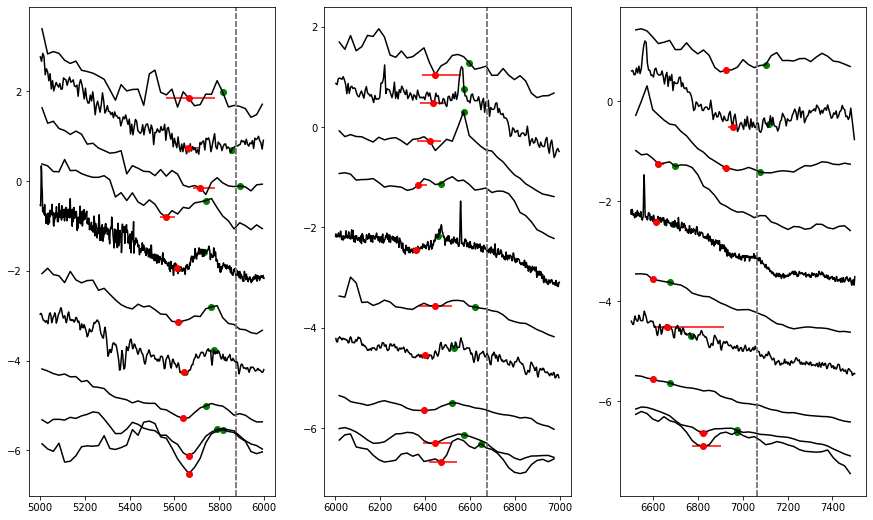

In [89]:
fig, axs = plt.subplots(ncols=3, figsize=(15,9))

def plot(ax, wlen_min, wlen_max, line, max_spec=100, print_names=False):
    specs = ds.specs[0:max_spec]
    for i, spec in enumerate(specs):
        if i > max_spec:
            continue
            
        if print_names:
            print(spec.meta['name'])
        
        offset = -i
        wave = spec['restwave']
        flux = np.array(spec['flux'], copy=True)
    
        idx = np.logical_and(spec['restwave'] > wlen_min, spec['restwave'] < wlen_max)
        
        log_flux = np.log(flux+np.abs(np.nanmin(flux))+1e-10)
        
        #flux -= np.nanmin(flux)
        #flux -= 0.9*np.nanmean(flux[idx])
        
        #log_flux -= np.nanmin(log_flux)
        #flux /= 0.5*np.nanstd(flux[idx])
        #flux /= 0.1*np.nanmax(flux[idx])
        log_flux /= 0.4*np.percentile(log_flux, 95)
        flux /= 0.3*np.percentile(flux, 90)
        
        #flux *= -1
        
        ax.plot(wave[idx], flux[idx]+offset, color='black')

        ret = load_measurements(ds, spec.meta['name'], ds.rev, line)
        if ret is None:
            continue
        
        line_idx = np.argmin(np.abs(wave-ret['center_q50']))
        yerr = ([ret['center_q50']-ret['center_q15.9']], [ret['center_q84.1']-ret['center_q50']])
        #print(yerr)
        ax.errorbar(wave[line_idx], flux[line_idx]+offset, color='red', xerr=yerr, marker='o')
        
        line_idx = np.argmin(np.abs(wave-ret['center_q50']-ret['center_offset_em_q50']))
        ax.scatter(wave[line_idx], flux[line_idx]+offset, color='green')
        ax.axvline(line, ls='--', alpha=0.5, color='grey')
    #ax.invert_yaxis()
        
plot(axs[0], 5000, 6000, 5876, max_spec=10, print_names=True)
plot(axs[1], 6000, 7000, 6678, max_spec=10)
plot(axs[2], 6500, 7500, 7065, max_spec=10)

In [ ]:
for i, spec in enumerate(ds.specs[::-1]):
        wave = spec['restwave']
        flux = spec['flux']#*wave
        phase = spec.meta['phase']

        flux -= 0.9*np.nanmean(flux)
        flux /= 0.5*np.nanstd(flux)
        #flux *= -1

        idx = np.abs(flux) < 10
        idx = np.logical_and(idx, np.logical_and(spec['restwave'] > 5000, spec['restwave'] < 6000))

        axs[0].plot(wave[idx], flux[idx]+5*i, color='black')
        #label = '%.1fd' % phase
        #ax.text(x=wave.max()+75, y=5*i, s=label)
        
        ret = load_measurements(ds, spec.meta['name'], ds.rev, 5876)
        if ret is None:
            continue
        line_idx = np.argmin(np.abs(wave-ret['center_q50']))
        axs[0].scatter(wave[line_idx], flux[line_idx]+5*i, color='red')
        
#axs[0].invert_yaxis()
        
for i, spec in enumerate(ds.specs[::-1]):
        wave = spec['restwave']
        flux = spec['flux']#*wave
        phase = spec.meta['phase']

        flux -= 0.9*np.nanmean(flux)
        flux /= 0.5*np.nanstd(flux)
        #flux *= -1

        idx = np.abs(flux) < 10
        idx = np.logical_and(idx, np.logical_and(spec['restwave'] > 6000, spec['restwave'] < 7000))

        axs[1].plot(wave[idx], flux[idx]+5*i, color='black')
        #label = '%.1fd' % phase
        #ax.text(x=wave.max()+75, y=5*i, s=label)
        
        ret = load_measurements(ds, spec.meta['name'], ds.rev, 6678)
        if ret is None:
            continue
        line_idx = np.argmin(np.abs(wave-ret['center_q50']))
        axs[1].scatter(wave[line_idx], flux[line_idx]+5*i, color='red')
        
for i, spec in enumerate(ds.specs[::-1]):
        wave = spec['restwave']
        flux = spec['flux']#*wave
        phase = spec.meta['phase']

        flux -= 0.9*np.nanmean(flux)
        flux /= 0.5*np.nanstd(flux)
        #flux *= -1

        idx = np.abs(flux) < 10
        idx = np.logical_and(idx, np.logical_and(spec['restwave'] > 6500, spec['restwave'] < 7500))

        axs[2].plot(wave[idx], flux[idx]+5*i, color='black')
        #label = '%.1fd' % phase
        #ax.text(x=wave.max()+75, y=5*i, s=label)
        
        ret = load_measurements(ds, spec.meta['name'], ds.rev, 7065)
        if ret is None:
            continue
        line_idx = np.argmin(np.abs(wave-ret['center_q50']))
        axs[2].scatter(wave[line_idx], flux[line_idx]+5*i, color='red')
        
#axs[1].invert_yaxis()

In [61]:
log_flux

NameError: name 'log_flux' is not defined

In [63]:
np.log(ds.specs[0]['flux'])

<ipython-input-63-486a8bda34f9>:1: RuntimeWarning: invalid value encountered in log
  np.log(ds.specs[0]['flux'])


<Column name='flux' dtype='float64' length=214>
 -35.43883014315027
 -34.83283085977252
 -35.07737282354238
                nan
                nan
 -36.05909568710578
-38.843015595481155
                nan
 -36.01064743026463
 -35.44048739921019
 -35.52191733416255
-36.102122601139676
                ...
 -37.67340636672116
 -37.46633313797458
 -37.50928742942693
-37.844867480585144
 -37.91672886326388
-37.884319995662885
 -37.93996770376413
 -37.91299516245069
 -37.68957468977593
 -37.73220367638756
 -38.24297647655085
 -37.93720028030317